In [27]:
import numpy as np
!pip install pandas

In [28]:
class Graph:

    def __init__(self,n,m,l):
        self.n = n
        self.m = m
        self.l = l

    def getGraph(self):
        matrix = []
        #s = np.matrix()
        
        for i in range(self.n):
            a = []
            for j in range(self.n):
                if abs(i-j) in self.l:
                    a.append(1)
                else:
                    a.append(0)
            a = np.array(a)
            matrix.append(a)
        matrix = np.matrix(matrix)
        
        return matrix

In [29]:

graphs_file = open(r'graphs.txt')
graphs_input = graphs_file.readlines()


chr_nums_file = open(r'chr_nums.txt')
chr_nums = chr_nums_file.readlines()

In [30]:
graphs = []



for i in range(len(chr_nums)):
    chr_nums[i] = chr_nums[i].strip('\n')
    chr_nums[i] = int(chr_nums[i])
    chr_nums[i] /= 20

for i in range(len(graphs_input)):
    graphs_input[i] = graphs_input[i].strip(' \n')
    
    if i % 3 != 2:
        graphs_input[i] = int(graphs_input[i])
    else:
        graphs_input[i] = graphs_input[i].split(" ")
        
        for j in range(len(graphs_input[i])):
            graphs_input[i][j] = int(graphs_input[i][j])

        tmp = Graph(graphs_input[i-2], graphs_input[i-1], graphs_input[i])
        
        
        graphs.append(tmp.getGraph())

In [31]:
import numpy as np
for i in range(1000):
    graphs[i]=np.pad(graphs[i],[(0,20-len(graphs[i])),(0,20-len(graphs[i]))],mode='constant')

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_rem, y_train, y_rem = train_test_split(graphs, chr_nums, train_size=0.8)

test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

x_train = np.expand_dims(x_train, axis=-1) 
y_train = np.expand_dims(y_train, axis=-1) 

x_valid = np.expand_dims(x_valid, axis=-1) 
y_valid = np.expand_dims(y_valid, axis=-1) 

x_test = np.expand_dims(x_test, axis=-1) 
y_test = np.expand_dims(y_test, axis=-1)

print(x_test)
print(y_test)

[[[[0]
   [1]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[1]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [1]
   [0]
   ...
   [1]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [1]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[1]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [1]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[1]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [1]
   [1]
   ...
   [0]
   [0]
   [0]

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, InputLayer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU


In [34]:
model = Sequential()

model.add(InputLayer(input_shape = (20, 20, 1)))
model.add(Conv2D(512, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.15))


model.add(Dense(300, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(19, activation='relu')) 


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.MAE,  metrics=[tf.keras.metrics.MeanAbsoluteError()]) #istraži

early_stopping_callback = EarlyStopping(patience = 50, monitor = 'val_loss', restore_best_weights = True, 
                                        min_delta = 0.000001)

model.fit(x_train, y_train, validation_data= (x_valid, y_valid), 
                      epochs = 500, verbose = 0,
                      callbacks = [early_stopping_callback])
model.evaluate(x = x_valid, y = y_valid)
l = model.predict(x_test)

100/100 [==============================] - 0s 2ms/sample - loss: 0.0145 - mean_absolute_error: 0.0145


In [36]:

l
tmp = []
for i in range(len(l)):
    tmp.append(np.sum(l[i]))

[5.194775,
 1.906031,
 2.8672025,
 1.906031,
 3.6822424,
 2.8488972,
 4.1263742,
 1.9062105,
 5.8965282,
 1.906031,
 4.92483,
 4.764293,
 5.667106,
 3.037506,
 1.906031,
 3.9397883,
 1.906031,
 1.906031,
 3.8182502,
 5.270012,
 2.8421645,
 1.906031,
 2.96593,
 2.8687193,
 1.906031,
 2.9650156,
 3.1797364,
 4.0032716,
 4.0842743,
 4.009295,
 1.906031,
 3.6977193,
 1.906031,
 3.7749374,
 2.829408,
 3.1525326,
 4.5763006,
 3.2878041,
 2.9925172,
 4.3885775,
 5.362355,
 3.4335148,
 1.9177831,
 5.4265094,
 2.877534,
 5.45056,
 1.906031,
 4.6757193,
 4.1799016,
 2.06581,
 1.9117026,
 3.7295234,
 4.5551043,
 2.9249396,
 2.8682046,
 2.8909812,
 2.91038,
 1.9722775,
 1.906031,
 5.730983,
 5.249831,
 1.906031,
 3.0409858,
 1.906031,
 4.4630094,
 1.906031,
 3.175899,
 3.8044908,
 1.906031,
 1.9104601,
 2.9477072,
 1.906031,
 5.1156135,
 2.9650156,
 2.5513666,
 4.394583,
 4.7061477,
 3.0579596,
 1.906031,
 4.3578568,
 1.906031,
 3.9647455,
 4.4260116,
 5.2655807,
 4.540649,
 2.9410145,
 6.3625455,

In [37]:
import pandas
def create_df_output(clf, y, df):
    for i in range(len(y)):
        y[i] = y[i][0]
    yy = []
    for i in range(len(y)):
        yy.append(y[i][0] * 20)
    
    df_output = pandas.DataFrame()
    df_output['actual'] = yy
    #print(df_output)
    l = model.predict(x_test)
    l
    tmp = []
    for i in range(len(l)):
        tmp.append(np.sum(l[i]))
    df_output['pred'] = tmp
    df_output['error'] = df_output.actual - df_output.pred
    df_output['abs_error'] = np.abs(df_output['error'])
    print(df_output)
    return(df_output)

In [38]:
chr_nums = np.array(chr_nums)
out = create_df_output(model, y_test, x_test)


    actual      pred     error  abs_error
0      5.0  5.194775 -0.194775   0.194775
1      3.0  1.906031  1.093969   1.093969
2      3.0  2.867203  0.132797   0.132797
3      2.0  1.906031  0.093969   0.093969
4      4.0  3.682242  0.317758   0.317758
..     ...       ...       ...        ...
95     2.0  1.906031  0.093969   0.093969
96     3.0  1.906031  1.093969   1.093969
97     3.0  2.924940  0.075060   0.075060
98     3.0  2.868719  0.131281   0.131281
99     2.0  1.906031  0.093969   0.093969

[100 rows x 4 columns]


In [45]:
def compute_acc(df, diff):
    print("% within ", diff, "of true chromatic#:", 
          100 * np.sum(df['abs_error']<= diff) / np.sum(df['abs_error']>= 0))

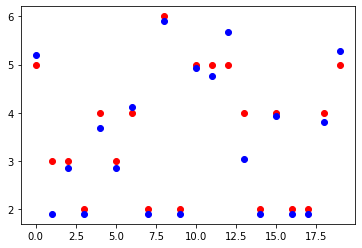

In [51]:
import matplotlib.pyplot as plt
x = []
for i in range(20):
    x.append(i)
x = np.array(x)
y = np.array(out['actual'][:20])
plt.scatter(x,y, color = 'red')

y = np.array(out['pred'][:20])
plt.scatter(x,y,color = 'blue')
plt.show()

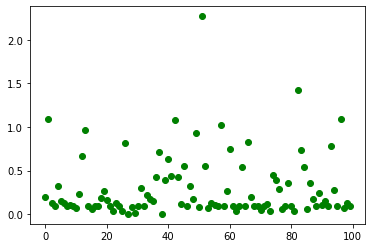

In [55]:
x = []
for i in range(100):
    x.append(i)
x = np.array(x)
y = np.array(out['abs_error'])
plt.scatter(x,y,color = 'green')
plt.show()

In [52]:

compute_acc(out,0.5)
#--------------------------------------#

% within  0.5 of true chromatic#: 80.0


In [53]:
compute_acc(out,1)

% within  1 of true chromatic#: 94.0
